In [1]:
##importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
%matplotlib inline

In [2]:
data_frame = pd.read_csv('taxi.csv')
data_frame

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0           2      7/15/2019 16:27       7/15/2019 16:44                3   
1           2      7/17/2019 20:26       7/17/2019 20:40                6   
2           2       7/6/2019 16:01        7/6/2019 16:10                1   
3           1      7/18/2019 22:32       7/18/2019 22:35                1   
4           2      7/19/2019 14:54       7/19/2019 15:19                1   
..        ...                  ...                   ...              ...   
195         2       1/18/2019 8:42        1/18/2019 8:56                1   
196         1       1/19/2019 4:34        1/19/2019 4:43                1   
197         2       1/5/2019 10:37        1/5/2019 10:42                1   
198         2      1/23/2019 10:36       1/23/2019 10:44                2   
199         2       1/30/2019 6:55        1/30/2019 7:07                5   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0             2.02           1                  N           186           233   
1             1.59           1                  N           141           161   
2             1.69           1                  N           246           249   
3             0.90           1                  N           229           141   
4             4.79           1                  N           237           107   
..             ...         ...                ...           ...           ...   
195           1.18           1                  N            43           237   
196           2.30           1                  N           148           234   
197           0.83           1                  N           237           263   
198           1.12           1                  N           144           113   
199           2.41           1                  N           209           107   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0               1         12.0    1.0      0.5        4.08           0.0   
1               2         10.0    0.5      0.5        0.00           0.0   
2               2          8.5    0.0      0.5        0.00           0.0   
3               1          4.5    3.0      0.5        1.65           0.0   
4               1         19.5    0.0      0.5        5.70           0.0   
..            ...          ...    ...      ...         ...           ...   
195             1         10.0    0.0      0.5        2.16           0.0   
196             1          9.5    0.5      0.5        2.15           0.0   
197             1          5.0    0.0      0.5        1.16           0.0   
198             2          7.0    0.0      0.5        0.00           0.0   
199             1         10.5    0.0      0.5        1.00           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  
0                      0.3         20.38                   2.5  
1                      0.3         13.80                   2.5  
2                      0.3         11.80                   2.5  
3                      0.3          9.95                   2.5  
4                      0.3         28.50                   2.5  
..                     ...           ...                   ...  
195                    0.3         12.96                   0.0  
196                    0.3         12.95                   0.0  
197                    0.3          6.96                   0.0  
198                    0.3          7.80                   0.0  
199                    0.3         12.30                   0.0  

[200 rows x 18 columns]

In [5]:
data_frame.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [4]:
#choose variables both independent and dependent variables


In [7]:
#total amount
w = data_frame.total_amount
w

0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

In [9]:
# independent variable
x =data_frame.trip_distance
x

0      2.02
1      1.59
2      1.69
3      0.90
4      4.79
       ... 
195    1.18
196    2.30
197    0.83
198    1.12
199    2.41
Name: trip_distance, Length: 200, dtype: float64

In [ ]:
#choose a class of model
from sklearn.linear_model import LinearRegression

In [10]:
#visualizing total amount
plt.plot(w)

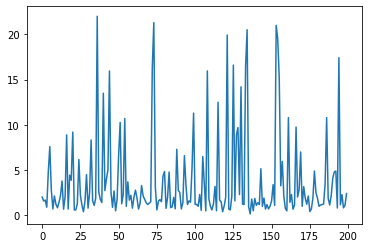

In [11]:
#visuailizing trip distance
plt.plot(x)

Text(0.5, 1.0, 'Scatter diagram of trip distance and total amount')

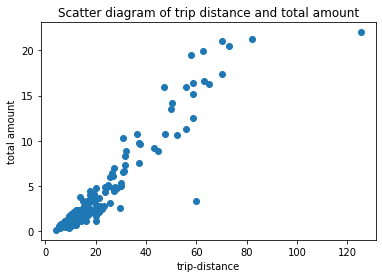

In [14]:
#visualizing both total amount and trip distance
plt.plot(w,x,'o');
plt.xlabel("trip-distance")
plt.ylabel("total amount")
plt.title('Scatter diagram of trip distance and total amount') 

It means that the further the trip distance the higher the total amount of money collected

In [15]:
t = data_frame.fare_amount
t

0      12.0
1      10.0
2       8.5
3       4.5
4      19.5
       ... 
195    10.0
196     9.5
197     5.0
198     7.0
199    10.5
Name: fare_amount, Length: 200, dtype: float64

In [16]:
y = data_frame.tip_amount
y

0      4.08
1      0.00
2      0.00
3      1.65
4      5.70
       ... 
195    2.16
196    2.15
197    1.16
198    0.00
199    1.00
Name: tip_amount, Length: 200, dtype: float64

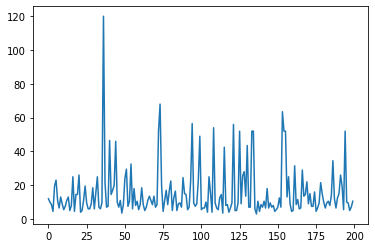

In [17]:
#visualizing  fare amount
plt.plot(t)

In [18]:
#visualizing tip_amount
plt.plot(y)

Text(0.5, 1.0, 'Scatter diagram of fare amount and tip amount')

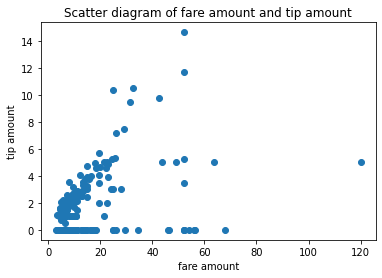

In [60]:
##visualzing both fare amount and tip amount
plt.plot(t,y,'o');
plt.xlabel("fare amount")
plt.ylabel("tip amount")
plt.title('Scatter diagram of fare amount and tip amount')

this means that when the fare amount is reduce from the original amount,then many customers will tip the conductor more money for beuing fair to them interms of his services

In [21]:
#what is the relationship
s =['trip_distance','tip_amount','total_amount','fare_amount']
v = data_frame[s]
v.corr()

trip_distance  tip_amount  total_amount  fare_amount
trip_distance       1.000000    0.429868      0.942506     0.933743
tip_amount          0.429868    1.000000      0.494920     0.358010
total_amount        0.942506    0.494920      1.000000     0.981740
fare_amount         0.933743    0.358010      0.981740     1.000000

There is a positive relationship between fare amount and total amount. This can be seen from the positive  values. The relationship is moderate(0.98). This means that people who pay the total amount increase the fare amount.

In [22]:
#importing the linear Regression class of the modelling
import statsmodels.formula.api as smf 

In [24]:
#fitting a simple linear regression
result = smf.ols('w~ x', data=data_frame).fit()
result.params


Intercept    7.437773
x            3.409864
dtype: float64

y=mx+c
? = 7.44x +3.4
if they increase trip distance by 1km then the total amount will also increase by $1 

In [25]:
# fitting multiple linear regression
results = smf.ols("w ~ x +t + y", data=data_frame).fit()
results.params

Intercept    2.005790
x            0.310181
t            0.952092
y            1.155560
dtype: float64

y=c+ m1x1 +m2x2 +m3x3 +---+mnxn +c
if they the trip distance by  (1km) keeping other factors such as fare amount,tip amount what will happen to total amount (it will also increase by $1 

choosing a class for mmodelling

In [26]:
Training_model = LinearRegression(fit_intercept = True) #trainng a class model
Training_model

LinearRegression()

In [27]:
#slicing inorder to know the range gap to work with 
w = w[:,np.newaxis]
w

C:\Users\Adequate Minister\AppData\Local\Temp\ipykernel_7072\2539489054.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  w = w[:,np.newaxis]


array([[ 20.38],
       [ 13.8 ],
       [ 11.8 ],
       [  9.95],
       [ 28.5 ],
       [ 37.28],
       [ 16.44],
       [ 10.3 ],
       [ 18.8 ],
       [ 12.3 ],
       [ 10.8 ],
       [ 13.56],
       [ 17.15],
       [ 13.8 ],
       [  8.3 ],
       [ 15.34],
       [ 44.75],
       [  9.35],
       [ 17.8 ],
       [ 18.3 ],
       [ 43.07],
       [  5.3 ],
       [ 10.35],
       [ 14.3 ],
       [ 26.8 ],
       [ 15.8 ],
       [ 11.76],
       [  9.3 ],
       [ 15.35],
       [ 27.35],
       [ 11.75],
       [ 22.55],
       [ 31.8 ],
       [ 11.8 ],
       [ 11.3 ],
       [ 15.96],
       [125.3 ],
       [ 29.8 ],
       [ 12.96],
       [ 12.96],
       [ 49.8 ],
       [ 22.56],
       [ 17.8 ],
       [ 29.91],
       [ 47.3 ],
       [ 15.87],
       [ 10.3 ],
       [ 17.15],
       [  7.8 ],
       [ 14.16],
       [ 31.3 ],
       [ 30.8 ],
       [ 12.96],
       [ 13.8 ],
       [ 52.4 ],
       [ 10.8 ],
       [ 21.3 ],
       [ 14.16],
       [ 17.16

In [28]:
#knowing the size of the model that ur training
w.shape


(200, 1)

In [29]:
#fitting a model x into y
x = y[:,np.newaxis]
x

C:\Users\Adequate Minister\AppData\Local\Temp\ipykernel_7072\1064399418.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = y[:,np.newaxis]


array([[ 4.08],
       [ 0.  ],
       [ 0.  ],
       [ 1.65],
       [ 5.7 ],
       [ 4.86],
       [ 2.14],
       [ 0.  ],
       [ 2.5 ],
       [ 0.  ],
       [ 1.5 ],
       [ 2.26],
       [ 2.85],
       [ 0.  ],
       [ 0.  ],
       [ 3.54],
       [10.33],
       [ 1.55],
       [ 0.  ],
       [ 0.  ],
       [ 7.15],
       [ 0.  ],
       [ 2.05],
       [ 0.  ],
       [ 3.5 ],
       [ 2.  ],
       [ 1.96],
       [ 0.  ],
       [ 2.55],
       [ 4.55],
       [ 1.95],
       [ 3.75],
       [ 3.  ],
       [ 1.  ],
       [ 1.5 ],
       [ 2.66],
       [ 5.  ],
       [ 5.  ],
       [ 2.16],
       [ 2.16],
       [ 0.  ],
       [ 3.76],
       [ 0.  ],
       [ 4.66],
       [ 0.  ],
       [ 2.07],
       [ 0.  ],
       [ 2.85],
       [ 0.  ],
       [ 2.36],
       [ 3.  ],
       [ 0.  ],
       [ 2.16],
       [ 0.  ],
       [10.48],
       [ 1.5 ],
       [ 0.  ],
       [ 2.36],
       [ 2.86],
       [ 0.  ],
       [ 2.45],
       [ 0.  ],
       [

In [30]:
#training model w,x
Training_model.fit(w,x)

LinearRegression()

In [31]:
#coefficient  of the model being trained
Training_model.coef_

array([[0.06644438]])

In [32]:
#intercept of model
Training_model.intercept_

array([0.67475668])

In [48]:
tolls_amount = np.linspace(-1,100)
tolls_amount

array([ -1.        ,   1.06122449,   3.12244898,   5.18367347,
         7.24489796,   9.30612245,  11.36734694,  13.42857143,
        15.48979592,  17.55102041,  19.6122449 ,  21.67346939,
        23.73469388,  25.79591837,  27.85714286,  29.91836735,
        31.97959184,  34.04081633,  36.10204082,  38.16326531,
        40.2244898 ,  42.28571429,  44.34693878,  46.40816327,
        48.46938776,  50.53061224,  52.59183673,  54.65306122,
        56.71428571,  58.7755102 ,  60.83673469,  62.89795918,
        64.95918367,  67.02040816,  69.08163265,  71.14285714,
        73.20408163,  75.26530612,  77.32653061,  79.3877551 ,
        81.44897959,  83.51020408,  85.57142857,  87.63265306,
        89.69387755,  91.75510204,  93.81632653,  95.87755102,
        97.93877551, 100.        ])

In [50]:
tolls_amount = tolls_amount[:,np.newaxis]
tolls_amount

array([[ -1.        ],
       [  1.06122449],
       [  3.12244898],
       [  5.18367347],
       [  7.24489796],
       [  9.30612245],
       [ 11.36734694],
       [ 13.42857143],
       [ 15.48979592],
       [ 17.55102041],
       [ 19.6122449 ],
       [ 21.67346939],
       [ 23.73469388],
       [ 25.79591837],
       [ 27.85714286],
       [ 29.91836735],
       [ 31.97959184],
       [ 34.04081633],
       [ 36.10204082],
       [ 38.16326531],
       [ 40.2244898 ],
       [ 42.28571429],
       [ 44.34693878],
       [ 46.40816327],
       [ 48.46938776],
       [ 50.53061224],
       [ 52.59183673],
       [ 54.65306122],
       [ 56.71428571],
       [ 58.7755102 ],
       [ 60.83673469],
       [ 62.89795918],
       [ 64.95918367],
       [ 67.02040816],
       [ 69.08163265],
       [ 71.14285714],
       [ 73.20408163],
       [ 75.26530612],
       [ 77.32653061],
       [ 79.3877551 ],
       [ 81.44897959],
       [ 83.51020408],
       [ 85.57142857],
       [ 87

In [51]:
#testing the model
#through predicting
passenger_count =Training_model.predict(tolls_amount)
passenger_count

array([[0.6083123 ],
       [0.74526909],
       [0.88222587],
       [1.01918266],
       [1.15613945],
       [1.29309623],
       [1.43005302],
       [1.5670098 ],
       [1.70396659],
       [1.84092338],
       [1.97788016],
       [2.11483695],
       [2.25179373],
       [2.38875052],
       [2.52570731],
       [2.66266409],
       [2.79962088],
       [2.93657766],
       [3.07353445],
       [3.21049124],
       [3.34744802],
       [3.48440481],
       [3.62136159],
       [3.75831838],
       [3.89527517],
       [4.03223195],
       [4.16918874],
       [4.30614552],
       [4.44310231],
       [4.5800591 ],
       [4.71701588],
       [4.85397267],
       [4.99092946],
       [5.12788624],
       [5.26484303],
       [5.40179981],
       [5.5387566 ],
       [5.67571339],
       [5.81267017],
       [5.94962696],
       [6.08658374],
       [6.22354053],
       [6.36049732],
       [6.4974541 ],
       [6.63441089],
       [6.77136767],
       [6.90832446],
       [7.045

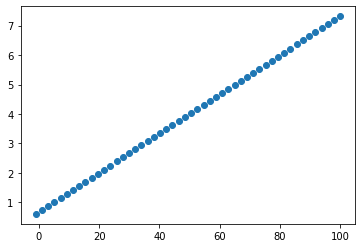

In [52]:
plt.scatter(w,x);

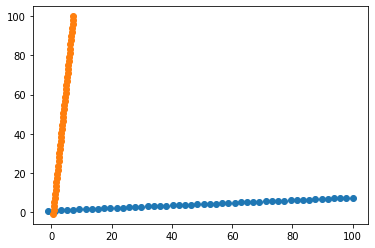

In [58]:
plt.scatter(w,x);
plt.scatter(passenger_count,tolls_amount)


In [ ]:
the trip distance,the fare amount intercept at zero

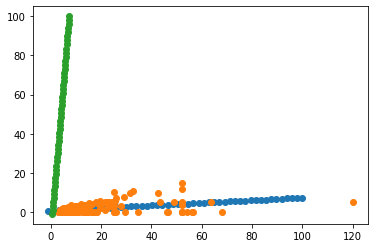

In [62]:
plt.scatter(w,x);
plt.scatter(t,y);
plt.scatter(passenger_count,tolls_amount)

as the toatl amount and the trip amount are high,the passenger count and the tolls numbers are very low w and sois the fare amount and the tip distance   

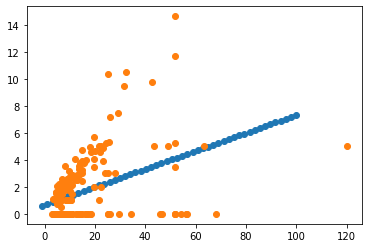

In [54]:
plt.scatter(w,x);
plt.scatter(t,y);


as the trip distance and total amount is at their  highest  , the fare amount and tip amount are moderate